In [ ]:
import pandas as pd
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error



In [ ]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [ ]:
houses_missing = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv', header=0)

In [ ]:
houses_missing_copy = houses_missing.copy()

# Data Understanding

In [ ]:
houses_missing.columns

Index(['Unnamed: 0', 'median_house_value', 'median_income',
       'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
houses_missing.head(10)

,Unnamed: 0,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,0,452600.0,8.3252,41.0,880.0,129.0,NaN,126.0,37.88,-122.23
1,1,358500.0,8.3014,21.0,7099.0,1106.0,NaN,1138.0,37.86,-122.22
2,2,352100.0,7.2574,52.0,1467.0,190.0,NaN,177.0,37.85,-122.24
3,3,341300.0,5.6431,52.0,1274.0,235.0,NaN,219.0,37.85,-122.25
4,4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
5,5,269700.0,4.0368,52.0,919.0,213.0,413.0,193.0,37.85,-122.25
6,6,299200.0,3.6591,52.0,2535.0,489.0,1094.0,514.0,37.84,-122.25
7,7,241400.0,3.1200,52.0,3104.0,687.0,1157.0,647.0,37.84,-122.25
8,8,226700.0,2.0804,42.0,2555.0,665.0,1206.0,595.0,37.84,-122.26
9,9,261100.0,3.6912,52.0,3549.0,707.0,1551.0,714.0,37.84,-122.25


In [ ]:
houses_missing.isnull().sum() / len(houses_missing.index) * 100

Unnamed: 0             0.0
median_house_value     0.0
median_income         50.0
housing_median_age    50.0
total_rooms            0.0
total_bedrooms         0.0
population            50.0
households             0.0
latitude               0.0
longitude              0.0
dtype: float64

In [ ]:
df  = houses_missing.drop(['Unnamed: 0'], axis=1)
summary_stats = df.describe()
print(summary_stats)


       median_house_value  median_income  housing_median_age   total_rooms  \
count        20640.000000   10320.000000        10320.000000  20640.000000   
mean        206855.816909       3.940372           27.649128   2635.763081   
std         115395.615874       1.915848           13.294325   2181.615252   
min          14999.000000       0.499900            1.000000      2.000000   
25%         119600.000000       2.603300           17.000000   1447.750000   
50%         179700.000000       3.601950           26.000000   2127.000000   
75%         264725.000000       4.835600           37.000000   3148.000000   
max         500001.000000      15.000100           52.000000  39320.000000   

       total_bedrooms    population    households      latitude     longitude  
count    20640.000000  10320.000000  20640.000000  20640.000000  20640.000000  
mean       537.898014   1352.802229    499.539680     35.631861   -119.569704  
std        421.247906   1074.226167    382.329753      2.

<Axes: >

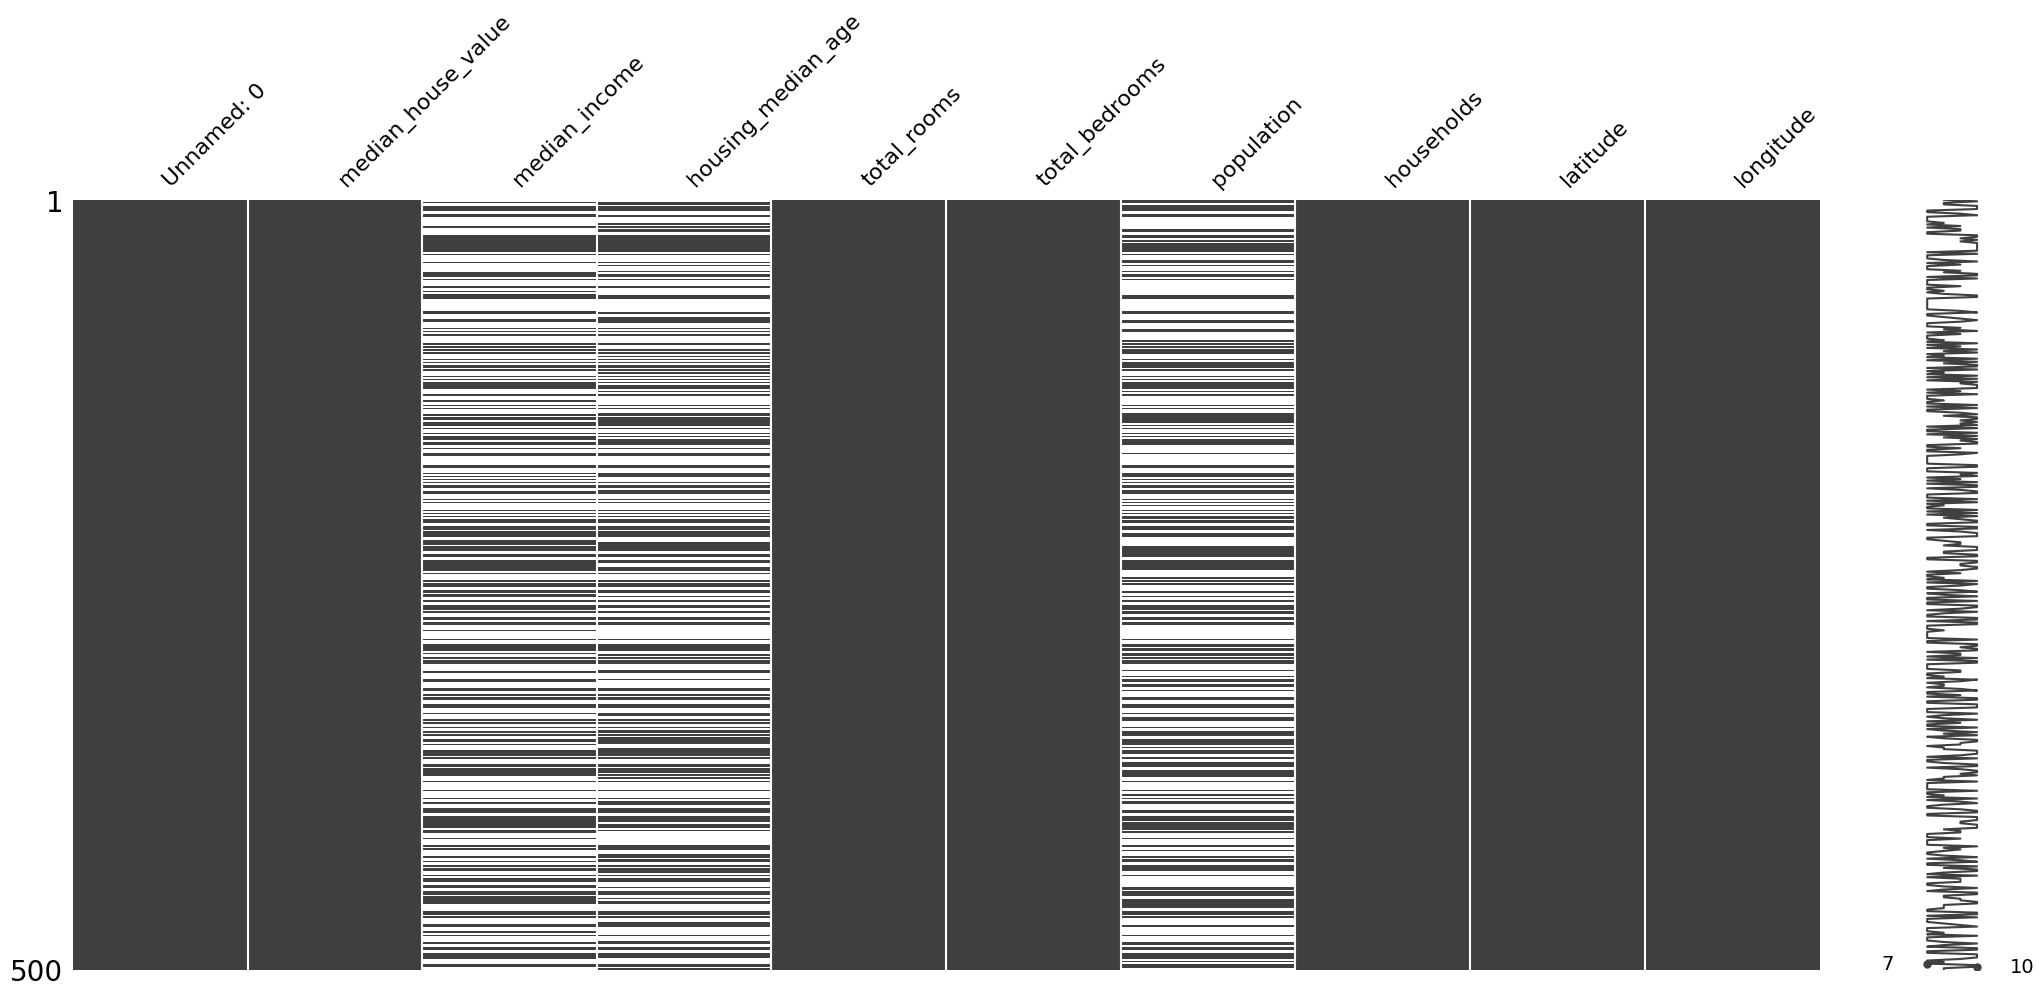

In [ ]:
%matplotlib inline
msno.matrix(houses_missing.sample(500, random_state=32))

<Axes: >

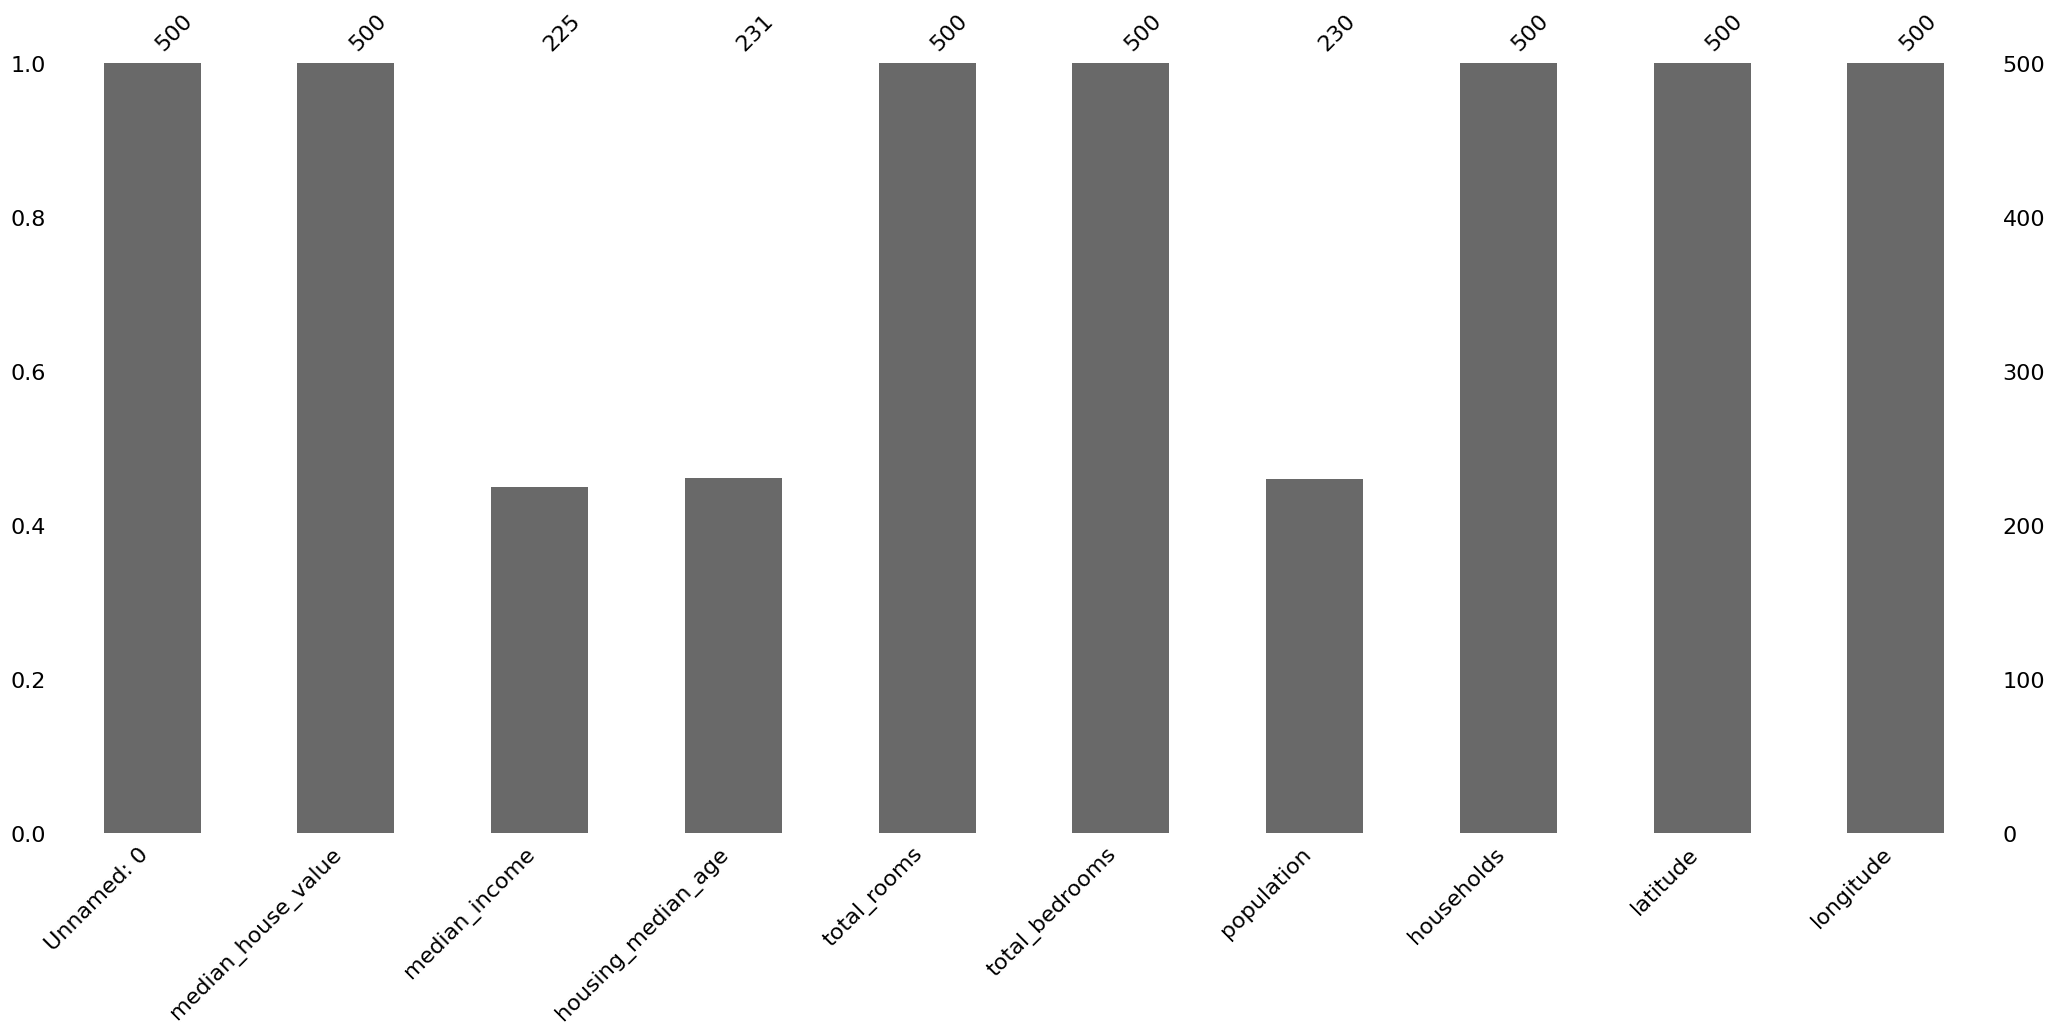

In [ ]:
%matplotlib inline
msno.bar(houses_missing.sample(500, random_state=32))



---



Exploratory Data Analysis (EDA)
---
In order to visualise my data, I have used three methods:

- Statistics for null values:
Output provided is a summary of missing values percantages for each column in the houses_missing DataFrame. The percentages indicate the proportion of missing values for each column.
  - This helped me identify that the missing values are in median_income, housing_median_age and population. With each of them missing 50% of their data.

- Statistics for the overall data: The output shows me the exact amount of data for all columns including missing columns. The min, max, standard deviation, mean and what the percentage most of the data is in.
  - This helped me identify the overall scale of my data.
  - Analyzing descriptive statistics and visualizations gave me crucial context to judge my imputation results. Comparing key data properties before and after let me quantify changes and assess if they skewed the data.


- Matrix:
Output for the matrix provides a visual representation of missing values in my dataset, with white lines indicating the positions of missing values. It helps to quickly identify patterns or clusters of missing data.
  - This helped me visually confirm that the missing values are scattered rather than concentrated in specific rows.
  - Shows me that the missing columns are generally not in the same rows

- Bar Chart:
With the bar chart I can see a sample of 500 rows, this shows an approximation of what I learned from my observations from the statistics and matrix and did not give me any additional insights for my EDA


---

# KNN Imputation

In [ ]:
imputer = KNNImputer(n_neighbors=5)
imputed_df_KNN = pd.DataFrame(imputer.fit_transform(houses_missing), columns=houses_missing.columns)

In [ ]:
imputed_df_KNN.isnull().sum() / len(houses_missing.index) * 100

Unnamed: 0            0.0
median_house_value    0.0
median_income         0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
latitude              0.0
longitude             0.0
dtype: float64

In [ ]:
# Prepare the features (X) and target (y) for modeling

# Drop the 'median_house_value' column from the features, leaving X with only the other features
X = imputed_df_KNN.drop('median_house_value', axis=1)

# Set y to 'median_house_value'
y = imputed_df_KNN['median_house_value']

# Split the data into training and testing sets
# 80% of the data is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
M1 = LinearRegression()

# Train the model with the training data
M1.fit(X_train, y_train)

# Predict the target values for the test set
y_test_pred = M1.predict(X_test)


In [ ]:
# Calculate the Root Mean Squared Error (RMSE) for the model predictions
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.3f}".format(rmse))

# Calculate the Root Mean Squared Percentage Error (RMSPE)
# RMSPE is the RMSE normalized by the range of y_test values, expressed as a percentage
rmspe = rmse / (np.max(y_test) - np.min(y_test)) * 100
print("RMSPE: {:.3f}".format(rmspe))

# Calculate the Mean Absolute Error (MAE) for the model predictions
mae = mean_absolute_error(y_test, y_test_pred)
print("MAE: {:.3f}".format(mae))

# Calculate the R-squared (R2) score for the model
r2 = r2_score(y_test, y_test_pred)
print("R2: {:.3f}".format(r2))


RMSE: 62777.876
RMSPE: 12.944
MAE: 45887.147
R2: 0.699


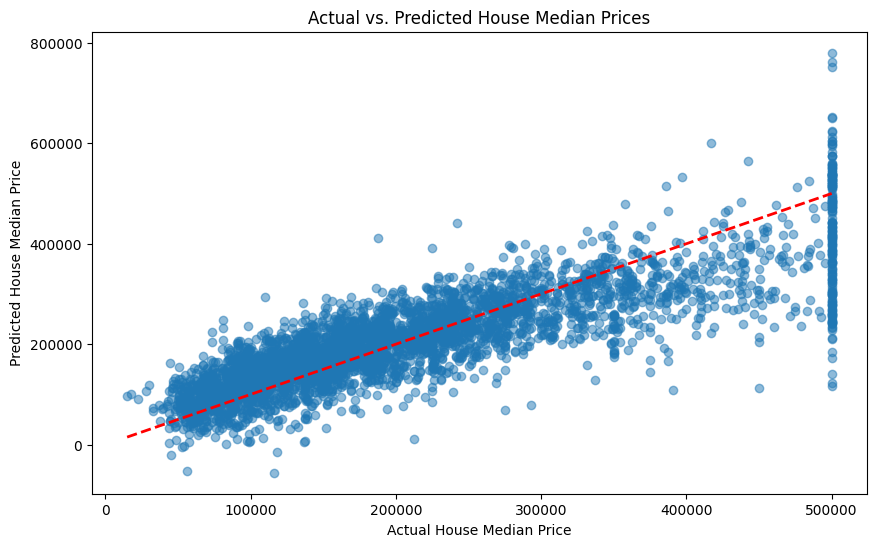

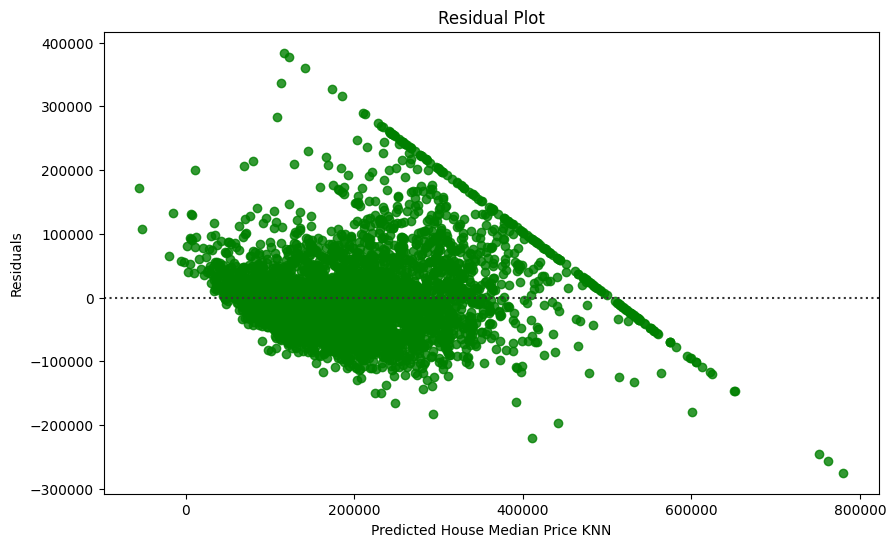

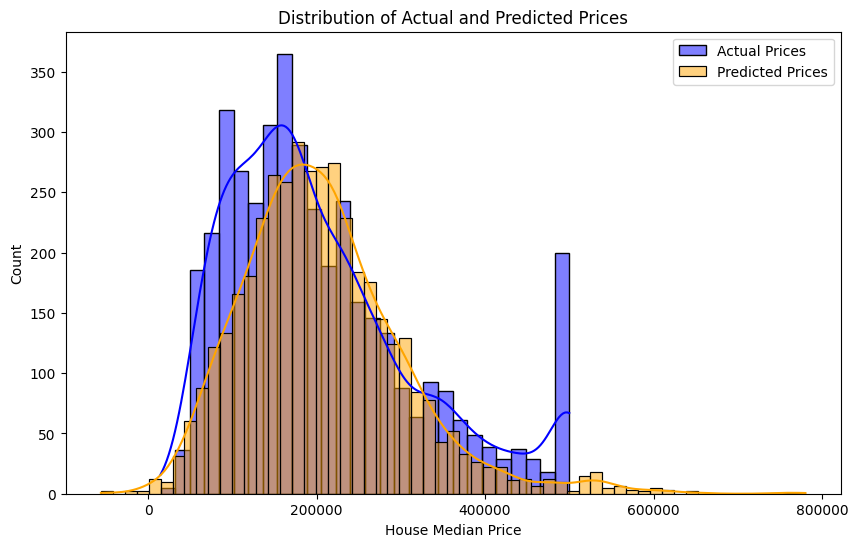

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.title('Actual vs. Predicted House Median Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Adding the diagonal line
plt.xlabel('Actual House Median Price')
plt.ylabel('Predicted House Median Price')
plt.show()

residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, color='g')
plt.title('Residual Plot')
plt.xlabel('Predicted House Median Price KNN')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(10, 6))

sns.histplot(y_test, kde=True, color="blue", label="Actual Prices")

sns.histplot(y_test_pred, kde=True, color="orange", label="Predicted Prices")

plt.title("Distribution of Actual and Predicted Prices")
plt.xlabel("House Median Price")
plt.legend()
plt.show()

# KNN Assesment



I have used several methods to evaluate the performance of my linear regression model trained from my KNN imputation:

Statistics
---
  - **RMSE: 62,777.876**

      RMSE measures the average magnitude of the errors between predicted values and actual values. It is the square root of the variance of the residuals which means it penalizes large errors more.

      Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response. It's the most important criterion for fit if the main purpose of the model is prediction [1] .

      A value of 62,777.876 indicate that, on average, the predictions made by the model have an error of approximately 62,777.876 units when compared to the actual values.

       In this context, an RMSE of 62,777.876 is considered poor, given the value range of 14,999 - 500,001 in the dataset.

      To fully be able to understand this value, I also used RMSPE.
      
  - **RMSPE: 12.944**

      Root Mean Squared Percent Error (RMSPE)
      is measured in percentage error relative to the test data.
      This calculation takes the output of my RMSE and divides it by (np.max(y_test) - np.min(y_test)) which is the difference between the maximum and minimum values. [2] This performs normalization to my dataset by range and when you multiply that by 100 we get 12.944.
      
       An rmspe value of 12.944 means that, on average, the model's predictions have an error that is approximately 12.944% of the range of the target variable , indicating a moderate level of accuracy in capturing the underlying patterns within the dataset.

       Looking at RMSPE helped me understand my RMSE better.
    
  - **MAE: 45887.147**
    
      MAE is easy to interpret, and each error contributes proportionally to the total error [3].

      MAE is less sensitive to outliers because it does not involve squaring the errors.

      Considering the scale of my values are between 14,999 - 500,001. My MAE value is 45,887 which is significantly better than my RMSE which suggests the presence of a substantial amount of outliers in my dataset.

      Futhermore, I know my dataset has a lot of outliers from my previous EDA while performing anomaly detection so MAE may not be an accurate representation.
  - **R2: 0.699**
      
      R-squared evaluates the scatter of the data points around the fitted regression line. Higher R-squared values represent smaller differences between the observed data and the fitted values. [4]

      An R-squared value of 0.699 indicates that approximately 69.9% of the variance in the dependent variable can be explained by the independent variables in my regression model.

      While 0.699 may not be perfect, it suggests a moderate relationship between the independent and dependent variables.

Graphs
---
  - **Predicted vs. Actual Scatter plot:**
  
   This plot helps me visualise the performance of my model relative to a line of best fit and I can see that my model performs generally well clustering around the line of best fit, it is mostly skewed between positive and negative values without favoring either side. There are moderate amount of outliers and a more negative favourism on the y-axis as you move through the x-axis. It has noticeable dispersion as prices increase, indicating potential inaccuracies in higher price predictions.

  - **Residual plot:**
  
   Interpretation of my residual plot depends on a couple factors [5].
    - They're pretty symmetrically distributed, tending to cluster towards the middle of the plot.
    - It favors the positive side just a tiny bit more
    - Shows a pattern of residuals increasing with the predicted prices, which suggests that the model may be less reliable for more expensive houses which was highlighted in my scatterplot.
  
  - **Bar chart comparing actual vs. predicted values:**
  
   The central tendency of the predicted prices appears to be skewed to the right. The peaks do not align, indication the model does not capture the overall trend very accurately. The spread of the predicted prices, as depicted by the orange histogram, is in reasonable agreement with the spread of the actual prices (blue histogram). This suggests that the model is capturing the variability in the data. The tails of the histograms suggest that there are outliers or a significant skewness in the predicted prices compared to actual prices, further investigation may be needed to understand the model's behavior in these regions.


# MICE Imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

# Initialize the Iterative Imputer with 10 iterations and a set random state
imputer = IterativeImputer(max_iter=10, random_state=0)
# Apply the imputer to the DataFrame with missing values ('houses_missing_copy')
imputed_values = imputer.fit_transform(houses_missing_copy)

# Convert the array of imputed values back into a DataFrame
imputed_df_MICE = pd.DataFrame(imputed_values, columns=houses_missing_copy.columns)

In [ ]:
# Calculate the proportion of missing values in each column of 'imputed_df_MICE' to see if it is imputed
imputed_df_MICE.isnull().sum() / len(houses_missing.index) * 100

Unnamed: 0            0.0
median_house_value    0.0
median_income         0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
latitude              0.0
longitude             0.0
dtype: float64

In [ ]:
# Separate the features (X2) and the target variable (y2) from 'imputed_df_MICE'
X2 = imputed_df_MICE.drop('median_house_value', axis=1)
y2 = imputed_df_MICE['median_house_value']

# 80% of the data is used for training, and 20% for testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize a new Linear Regression model (M2)
M2 = LinearRegression()

# Train the model on the training set
M2.fit(X_train2, y_train2)

# Predict the values using the trained model
y_test_pred2 = M2.predict(X_test2)


In [ ]:
# Calculate the Root Mean Squared Error (RMSE) for the model predictions
rmse = np.sqrt(mean_squared_error(y_test2, y_test_pred2))
print("RMSE: {:.3f}".format(rmse))

# Calculate the Root Mean Squared Percentage Error (RMSPE) for the model predictions
rmspe = rmse / (np.max(y_test2) - np.min(y_test2)) * 100
print("RMSPE: {:.3f}".format(rmspe))

# Calculate the Mean Absolute Error (MAE) for the model predictions
mae = mean_absolute_error(y_test2, y_test_pred2)
print("MAE: {:.3f}".format(mae))

# Calculate the R squared (R2) for the model predictions
r2 = r2_score(y_test2, y_test_pred2)
print("R2: {:.3f}".format(r2))


RMSE: 55847.536
RMSPE: 11.515
MAE: 38728.930
R2: 0.762


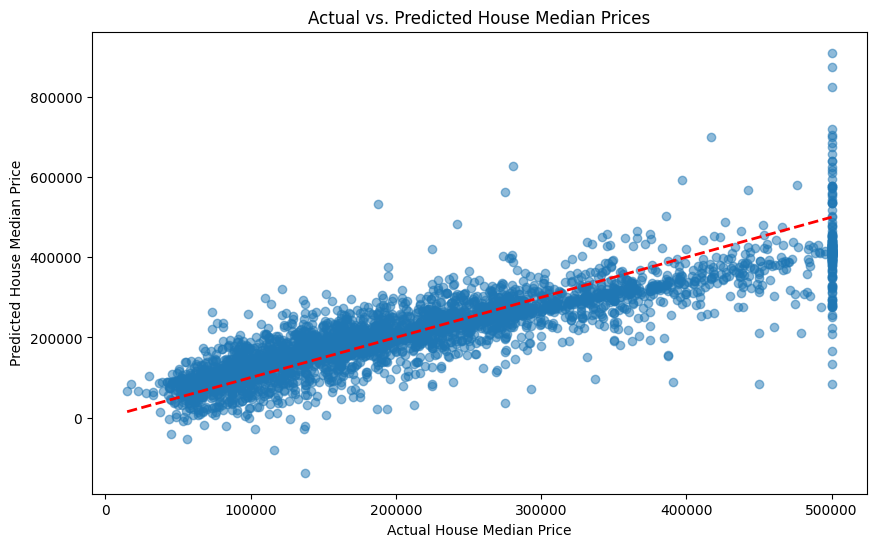

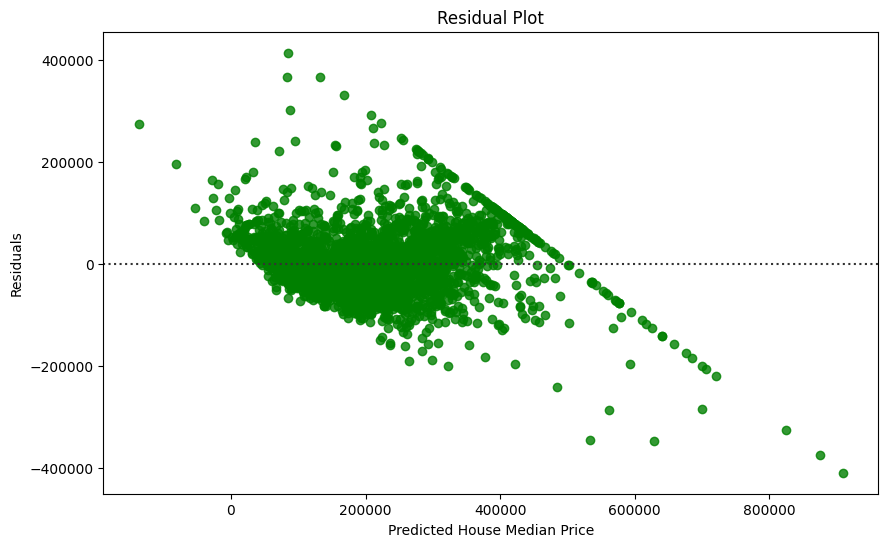

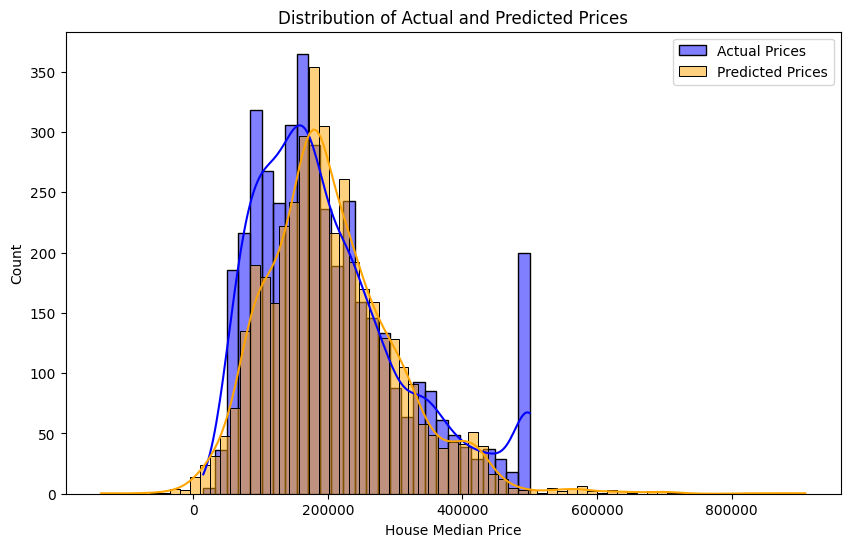

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_test_pred2, alpha=0.5)
plt.title('Actual vs. Predicted House Median Prices')
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], linestyle='--', color='red', linewidth=2)  # Adding the diagonal line
plt.xlabel('Actual House Median Price')
plt.ylabel('Predicted House Median Price')
plt.show()

# Residual plot
residuals2 = y_test2 - y_test_pred2
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred2, y=residuals2, color='g')
plt.title('Residual Plot')
plt.xlabel('Predicted House Median Price')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(10, 6))

sns.histplot(y_test2, kde=True, color="blue", label="Actual Prices")

sns.histplot(y_test_pred2, kde=True, color="orange", label="Predicted Prices")

plt.title("Distribution of Actual and Predicted Prices")
plt.xlabel("House Median Price")
plt.legend()
plt.show()

# MICE Assessment

I have used the same methods from KNN to evaluate the performance of my linear regression model from my MICE imputation:


Statistic
---


- RMSE: 55847.536

  I used my previous knowledge of RMSE from my KNN Assesment to evalute the performance of my model for MICE Imputation.

  The predictions made by the model have an error of approximately 55847.536 units when compared to the actual values.
  
  Considering the scale of my dataset, my rmse value is performing well.

- RMSPE: 11.515

  The model's predictions have an error that is approximately 11.515% of the range of the target variable , indicating a moderately good level of accuracy in capturing the underlying patterns within the dataset.

- MAE: 38728.930

  Considering the scale of my values are between 14,999 - 500,001. My MAE value is 38728.930 which is significantly better than my RMSE. This further proves the presence of a substantial amount of outliers in my dataset.

- R2: 0.762

  Approximately 76.2% of the variance in the dependent variable can be explained by the independent variables in my regression model.

  This value is an indication of good performance and shows a strong relationship between my vairables.

Graphs
---

- Predicted vs. Actual Scatter plot:

  The scatter plot comparing actual versus predicted house median prices, indicates a positive correlation as shown by the red dashed trend line. However, the scatter of points suggests variability in prediction accuracy, especially at higher price ranges where the data points deviate more from the line.

  Looking at this plot, I can see that my MICE imputation has a few outliers in the negative side but generally clustering around the line of best fit with a more negative favourism on the y-axis as you go towards the end of the x-axis. I can see a lot of outliers away from the line of best fit.

- Residual plot:

  The residual plot, displayes the differences between the actual and predicted values. The spread of residuals is not constant across the price range; it increases with the actual house price. This pattern suggests heteroscedasticity, meaning the model's predictive performance varies across different levels of the dependent variable. The model is less accurate for higher-valued houses, which could imply that different factors or a more complex model may be needed to improve predictions at the higher end of the market.


- Bar chart comparing actual vs. predicted values:

  The central tendency of the predicted prices appears to be skewed to the right. The peaks have a very small difference indicating the model does capture the overall trend very accurately. The model is capturing the variability in the data. The actual prices have a sudden spike towards the end which is not reflected in the predicted prices. The predicted prices have a longer tail which is not reflected in the actual prices.




# Comparison

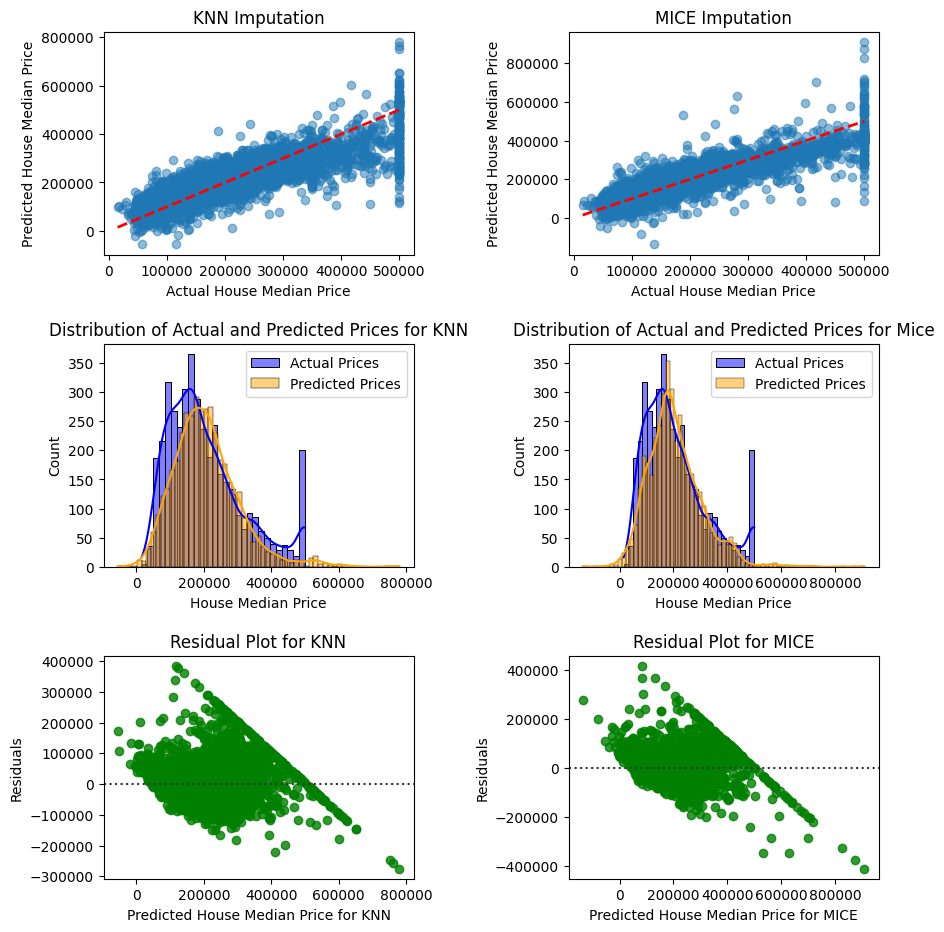

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

figure, axs = plt.subplots(3, 2, figsize=(10, 11), gridspec_kw={'wspace': 0.5, 'hspace': 0.4})


axs[0, 0].scatter(y_test, y_test_pred, alpha=0.5)
axs[0, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
axs[0, 0].set_title('KNN Imputation')
axs[0, 0].set_xlabel('Actual House Median Price')
axs[0, 0].set_ylabel('Predicted House Median Price')


sns.histplot(y_test, kde=True, color="blue", label="Actual Prices", ax=axs[1, 0])

sns.histplot(y_test_pred, kde=True, color="orange", label="Predicted Prices", ax=axs[1, 0])

axs[1, 0].set_title("Distribution of Actual and Predicted Prices for KNN")
axs[1, 0].set_xlabel("House Median Price")
axs[1, 0].legend()


axs[0, 1].scatter(y_test2, y_test_pred2, alpha=0.5)
axs[0, 1].plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], linestyle='--', color='red', linewidth=2)
axs[0, 1].set_title('MICE Imputation')
axs[0, 1].set_xlabel('Actual House Median Price')
axs[0, 1].set_ylabel('Predicted House Median Price')



sns.histplot(y_test2, kde=True, color="blue", label="Actual Prices", ax= axs[1, 1])

sns.histplot(y_test_pred2, kde=True, color="orange", label="Predicted Prices", ax = axs[1, 1])

axs[1, 1].set_title("Distribution of Actual and Predicted Prices for Mice")
axs[1, 1].set_xlabel("House Median Price")
axs[1, 1].legend()


sns.residplot(x=y_test_pred2, y=residuals2, color='g',  ax=axs[2, 1])
axs[2, 1].set_title('Residual Plot for MICE')
axs[2, 1].set_xlabel('Predicted House Median Price for MICE')
axs[2, 1].set_ylabel('Residuals')

sns.residplot(x=y_test_pred, y=residuals, color='g',  ax=axs[2, 0])
axs[2, 0].set_title('Residual Plot for KNN')
axs[2, 0].set_xlabel('Predicted House Median Price for KNN')
axs[2, 0].set_ylabel('Residuals')




plt.show()




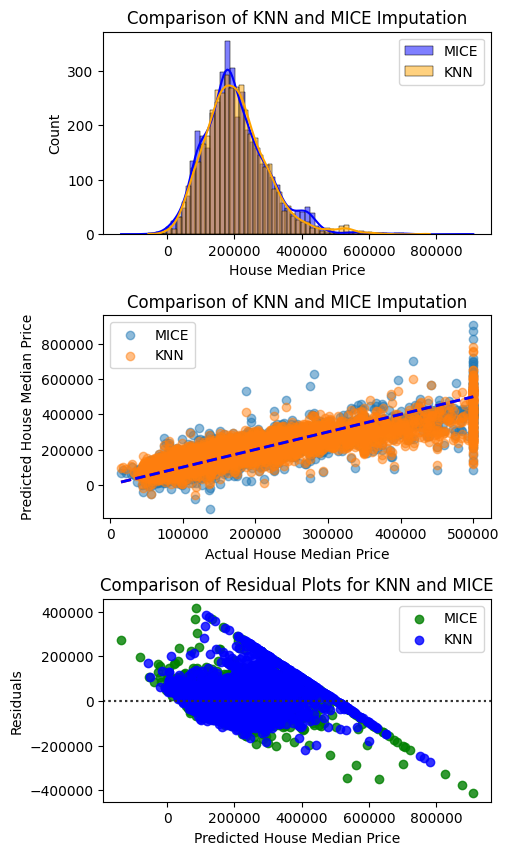

In [ ]:
figure, axs = plt.subplots(3, 1, figsize=(5, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.4})



sns.histplot(y_test_pred2, kde=True, color="blue", label="MICE", ax=axs[0])

sns.histplot(y_test_pred, kde=True, color="orange", label="KNN", ax=axs[0])

axs[0].set_title("Comparison of KNN and MICE Imputation")
axs[0].set_xlabel("House Median Price")
axs[0].legend()



# Scatter plot for MICE Imputation
axs[1].scatter(y_test2, y_test_pred2, alpha=0.5, label='MICE')
axs[1].plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], linestyle='--', color='red', linewidth=2)

# Scatter plot for KNN Imputation
axs[1].scatter(y_test, y_test_pred, alpha=0.5, label='KNN')
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)

axs[1].set_title('Comparison of KNN and MICE Imputation')
axs[1].set_xlabel('Actual House Median Price')
axs[1].set_ylabel('Predicted House Median Price')
axs[1].legend()

# Residual plot for MICE
sns.residplot(x=y_test_pred2, y=residuals2, color='g', ax=axs[2], label='MICE')

# Residual plot for KNN
sns.residplot(x=y_test_pred, y=residuals, color='b', ax=axs[2], label='KNN')

axs[2].set_title('Comparison of Residual Plots for KNN and MICE')
axs[2].set_xlabel('Predicted House Median Price')
axs[2].set_ylabel('Residuals')

# Add legend
axs[2].legend()




# Comparison of M1 and M2:

---

Statistical
---

1. RMSE:

  M1 (KNN) - 62,777.876

  M2 (MICE) - 55,847.536

  Difference - 6,930.34
  
  MICE performs significantly better than KNN in terms of RMSE, as lower values are desirable. The difference, while not extremely significant, favors MICE by 6,930.34

2. RMSPE:

  M1 (KNN) - 12.944

  M2 (MICE) - 11.515
  
  Difference - 1.429

  MICE has a slightly lower RMSPE compared to MICE, indicating a better overall performance. The difference of 1.429 is not substantial but favors MICE.

3. MAE:

  M1 (KNN) - 45887.147

  M2 (MICE) - 38728.930

  Difference - 7,158.217

  MICE outperforms KNN in terms of MAE, as the lower value is better. The difference of  7,158.217 suggests a significantly better performance for MICE.


4. R2:

  M1(KNN) - 0.699

  M2(MICE) - 0.762

  Difference - 0.063

 MICE has a slightly higher R2 value, indicating a slightly better fit to the data compared to MICE as higher R2 values suggest a better fit. The difference of 0.063 is small but suggests a slightly better explanatory power for MICE.


 In summary, across all metrics, MICE consistently shows a slightly better performance compared to KNN. While the differences are not substantial, they collectively indicate that, based on these metrics, MICE may be the preferable model for my specific task.


---


Graphical
---

I used two different methods to compare my models graphically -
Aligning them side by side and overlaying.

1. Barcharts:

  While the side-by-side comparison of the barcharts appears identical, a more subtle observation emerges when the charts are overlaid. Model 2 (MICE) exhibits a slightly elongated left tail, indicating the presence of more negative outliers. However, Model 1 (KNN) features a longer right tail, suggesting relatively more positive outliers. Additionally, Model 2 shows a substantially higher peak, indicating a denser concentration of values.

2. Scatterplots:

  When looking at my scatterplots, I can see that Model 2 (MICE) has more outliers than Model 1 (KNN) especially on the positive side. However, overall, they look almost identical. The difference in the number of outliers is only highlighted when you look at the overlayed graph.

3. Residual plots:
  
  Initially, the side-by-side comparison of the residual plots reveals subtle differences, with the primary distinction being the distribution of values along the y-axis. Model 2 (MICE) exhibits a greater prevalence of negative residuals. However, when overlaid, the residual plots underscore the presence of outliers in MICE, providing a clearer depiction of the variations between the two models.



---

Rationale for performance differences
---

 MICE (Multiple Imputation by Chained Equations) generally performs better than KNN (K-Nearest Neighbors) in imputing missing data for our specific dataset because MICE extends the concept of regression-based imputation across all variables in a dataset. Unlike KNN, which uses a distance function to impute missing values based on the nearest neighbors, MICE iteratively improves imputed values through a sequence of regression models [7]. This approach allows MICE to handle complex interactions between variables more effectively than KNN, which relies on distance metrics and may not capture these interactions as well. One more reason why MICE perfroms better for our dataset is because the missing data is Missing At Random (MAR), which is when MICE is particularly effective.


  KNN is simpler and can be effective for datasets where the most similar observations provide a good proxy for missing values. Furthermore, it will work way better when the dataset is MCAR or MNAR. However, it may not capture the complexity of the data as effectively as MICE for MAR datasets.


---

Which imputation method to choose and why
---

Based on my analysis and knowledge about my dataset, I would choose MICE for this dataset for a couple reasons:

1- MICE is particularly effective in datasets where there are complex interactions between variables. It iteratively applies regression models, allowing it to adaptively learn and account for these interactions. This is in contrast to KNN, which relies on proximity in feature space and may not adequately capture such complexity.

2- My dataset falls under the MAR category, where the probability of missingness is related to observed data but not the missing data itself. MICE is especially well-suited for MAR data. [7] It uses multiple imputations to account for the uncertainty inherent in the imputation process, which is beneficial in handling the randomness in the missing data pattern. KNN, while effective for MCAR (Missing Completely At Random) or MNAR (Missing Not At Random) scenarios, may not perform as well under MAR conditions.

3- As indicated by the statistical and graphical analyses, MICE consistently outperforms KNN across various metrics like RMSE, RMSPE, MAE, and R2. This suggests that MICE does a better job in my specific case at both capturing the central tendency and variability of the data, and fitting the model.


Given these factors, MICE stands out as the more suitable imputation method for my dataset. It aligns well with (MAR) and demonstrates superior capability in handling complex variable interactions, leading to better overall model performance. While KNN has its merits, especially in its simplicity and effectiveness in certain types of missing data scenarios, MICE's advantages in dealing with the specific challenges of my dataset make it the preferable choice.


---







Resources
---

[1] K. Grace-Martin, “Assessing the Fit of Regression Models,” The Analysis Factor, Dec. 08, 2008. https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/#:~:text=The%20RMSE%20is%20the%20square

[2] B. Williams, Ben WilliamsBen Williams; 1, “How to express root mean squared error as a percentage?,” Stack Overflow, https://stackoverflow.com/questions/55325114/how-to-express-root-mean-squared-error-as-a-percentage (accessed Dec. 15, 2023).

[3] TrainDataHub, “Interpretation of Evaluation Metrics For Regression Analysis MAE, MSE, RMSE, MAPE, R-Squared, And…,” Medium, May 23, 2022. https://medium.com/@ooemma83/interpretation-of-evaluation-metrics-for-regression-analysis-mae-mse-rmse-mape-r-squared-and-5693b61a9833

[4] J. Frost, “How To Interpret R-squared in Regression Analysis,” Statistics By Jim, 2018. https://statisticsbyjim.com/regression/interpret-r-squared-regression/

[5] qualtrics, “Interpreting Residual Plots to Improve Your Regression - Qualtrics Support,” Qualtrics Support, Jul. 19, 2017. https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/

[6] N. Erler, “EP : Missing Values in Clinical Research: Multiple Imputation . Imputation with Non-linear Functional Forms.” Accessed: Dec. 15, 2023. [Online]. Available: https://nerler.github.io/EP16_Multiple_Imputation/slide/11_imputation_with_non-linear_functions.pdf

[7] I. Dixon, "Data Imputation: Dealing with Missing Data," in CSC3831, School of Computing, Newcastle University UK, Sem. 1, 2023-24